In [1]:
import click
import logging
from pathlib import Path
from dotenv import find_dotenv, load_dotenv
import pandas as pd 
import numpy as np 
from pycaret.classification import *

In [2]:
data = pd.read_csv("../data/processed/train.csv", index_col=0)
test = pd.read_csv("../data/processed/test.csv", index_col=0)
ytest = test.Churn
test = test.drop("Churn", axis = 1)

#Creating pycaret setup
s = setup(data, target = "Churn", silent = True, 
          log_experiment=True, log_data = True, 
          normalize = True, transformation = True,
          ignore_low_variance = True, remove_multicollinearity = True,
          multicollinearity_threshold = 0.95, 
          experiment_name = "nb_churn_pred", log_plots = True)



,Description,Value
0,session_id,7704
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(6339, 20)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [3]:
data.Churn.value_counts()


No     4656
Yes    1683
Name: Churn, dtype: int64

In [4]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8048,0.8447,0.5325,0.6599,0.5890,0.4630,0.4678,0.0040
ada,Ada Boost Classifier,0.8035,0.8474,0.5411,0.6542,0.5916,0.4638,0.4679,0.0220
lr,Logistic Regression,0.8028,0.8488,0.5317,0.6543,0.5862,0.4586,0.4632,0.3090
ridge,Ridge Classifier,0.8021,0.0000,0.4794,0.6742,0.5599,0.4370,0.4478,0.0030
gbc,Gradient Boosting Classifier,0.8017,0.8483,0.5369,0.6487,0.5870,0.4581,0.4620,0.0560
lightgbm,Light Gradient Boosting Machine,0.7940,0.8368,0.5283,0.6284,0.5732,0.4390,0.4423,0.0120
rf,Random Forest Classifier,0.7857,0.8328,0.4957,0.6150,0.5478,0.4098,0.4145,0.0420
svm,SVM - Linear Kernel,0.7807,0.0000,0.4076,0.6637,0.4619,0.3465,0.3806,0.0050
knn,K Neighbors Classifier,0.7762,0.8010,0.5515,0.5784,0.5638,0.4136,0.4144,0.2030
et,Extra Trees Classifier,0.7719,0.8108,0.4906,0.5793,0.5302,0.3812,0.3841,0.0440


In [5]:
best = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7928,0.8403,0.5214,0.6289,0.5701,0.4352,0.4385
1,0.8086,0.8542,0.5470,0.6667,0.6009,0.4766,0.4807
2,0.8086,0.8479,0.5470,0.6667,0.6009,0.4766,0.4807
3,0.7815,0.8427,0.5299,0.5962,0.5611,0.4163,0.4176
4,0.7928,0.8307,0.5470,0.6214,0.5818,0.4448,0.4464
5,0.8198,0.8764,0.5726,0.6907,0.6262,0.5088,0.5127
6,0.8176,0.8662,0.5517,0.6882,0.6124,0.4950,0.5002
7,0.8172,0.8658,0.5345,0.6966,0.6049,0.4886,0.4959
8,0.7923,0.8273,0.4914,0.6333,0.5534,0.4209,0.4267


In [6]:
best = tune_model(best, n_iter = 1000)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8018,0.8401,0.5299,0.6526,0.5849,0.4566,0.4608
1,0.8086,0.8554,0.5470,0.6667,0.6009,0.4766,0.4807
2,0.8063,0.8479,0.5299,0.6667,0.5905,0.4658,0.4711
3,0.7860,0.8416,0.5214,0.6100,0.5622,0.4218,0.4241
4,0.7905,0.8295,0.5214,0.6224,0.5674,0.4307,0.4336
5,0.8266,0.8760,0.5726,0.7128,0.6351,0.5231,0.5285
6,0.8221,0.8670,0.5431,0.7079,0.6146,0.5016,0.5090
7,0.8172,0.8662,0.5259,0.7011,0.6010,0.4855,0.4940
8,0.7946,0.8289,0.4914,0.6404,0.5561,0.4255,0.4318


In [7]:
preds = predict_model(best, data = test)

In [8]:
preds

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Label,Score
0,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0.9461
1,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,0.7938
2,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.10,No,0.8358
3,Female,0,No,No,21,Yes,No,Fiber optic,No,Yes,...,No,No,Yes,Month-to-month,Yes,Electronic check,90.05,1862.90,Yes,0.5635
4,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,No,Two year,No,Bank transfer (automatic),99.90,7251.70,No,0.9792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,Male,0,No,Yes,57,Yes,Yes,DSL,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Mailed check,89.55,5012.35,No,0.9814
700,Male,0,No,No,23,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,81.00,1917.10,Yes,0.6064
701,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes,0.6033
702,Female,0,No,No,9,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,No,0.6223


In [9]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,1,Yes,No,16,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.75,1587.55,Yes
1,Female,0,No,No,2,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.70,169.80,Yes
2,Female,0,No,No,9,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),74.25,639.65,Yes
3,Female,0,No,Yes,15,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.00,994.80,Yes
4,Female,0,Yes,No,71,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),84.80,6046.10,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,Male,0,No,No,66,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.50,6710.50,Yes
6335,Male,0,Yes,No,16,Yes,No,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,No,Bank transfer (automatic),80.75,1321.30,No
6336,Female,0,Yes,Yes,36,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),97.35,3457.90,Yes
6337,Male,0,No,Yes,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,42.90,No


In [10]:
ytest

0       No
1       No
2       No
3       No
4       No
      ... 
699     No
700    Yes
701    Yes
702    Yes
703    Yes
Name: Churn, Length: 704, dtype: object

In [11]:
tuned_best = best


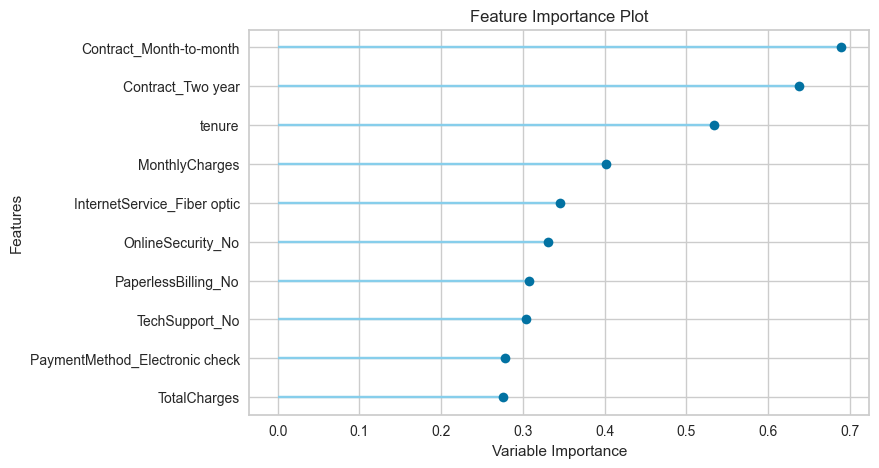

In [12]:
plot_model(tuned_best, plot = 'feature')

In [13]:
evaluate_model(tuned_best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [14]:
predict_model(tuned_best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8002,0.8389,0.5416,0.6619,0.5957,0.4648,0.4689


In [15]:
final_best = finalize_model(tuned_best)


In [16]:
save_model(final_best, 'diamond-pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                        target_variable='Churn',
                                        threshold=0.95)),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=0.056, class

In [17]:
!mlflow ui

^C
